In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array,arange, asarray
from math import pi

## Quantum Oscillator

In [2]:

m = 9.1094e-31
hbar= 1.0546e-34  
e = 1.6022e-19
a = 1e-11   
Eunit= hbar**2/(2*m*a**2)
N = 1000
dx= 1/N

def V(x):
    V0 = 50*e
    V0 /= Eunit
    return V0*x*x

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi= phi
    fphi= (V(x)-E)*psi
    return array([fpsi,fphi],float)

def solve(E):
    phi_all = []
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    for x in arange(-10,10,dx):
        k1 = dx*f(r,x,E)
        k2 = dx*f(r+0.5*k1,x+0.5*dx,E)
        k3 = dx*f(r+0.5*k2,x+0.5*dx,E)
        k4 = dx*f(r+k3,x+dx,E)
        r += (k1+2*k2+2*k3+k4)/6
        phi_all.append(r[0])
    return r[0], phi_all
    

E1 = 0.1
E2 = 0.4
psi2, _ = solve(E1)
target = 1.e-10
solution1 = None
while True:
    if abs(E1-E2)<target:
        break
    psi1 = psi2, 
    psi2, solution1 = solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E=",E2,"*hbar^2/2ma^2\n=",E2*Eunit,"J\n=",E2*Eunit/e,"eV\n \n")

E1 = 0.5
E2 = 0.7
psi2, _ = solve(E1)
target = 1.e-10
solution2 = None
while True:
    if abs(E1-E2)<target:
        break
    psi1 = psi2, 
    psi2, solution2 = solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E=",E2,"*hbar^2/2ma^2\n=",E2*Eunit,"J\n=",E2*Eunit/e,"eV\n \n")

E1 = 0.7
E2 = 1.5
psi2, _ = solve(E1)
target = 1.e-10
solution3 = None
while True:
    if abs(E1-E2)<target:
        break
    psi1 = psi2, 
    psi2, solution3 = solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E=",E2,"*hbar^2/2ma^2\n=",E2*Eunit,"J\n=",E2*Eunit/e,"eV\n \n")

E= [ 0.36225591] *hbar^2/2ma^2
= [  2.21142008e-17] J
= [ 138.02397203] eV
 

E= [ 1.08676774] *hbar^2/2ma^2
= [  6.63426024e-17] J
= [ 414.07191609] eV
 

E= [ 1.81127956] *hbar^2/2ma^2
= [  1.10571004e-16] J
= [ 690.11986015] eV
 



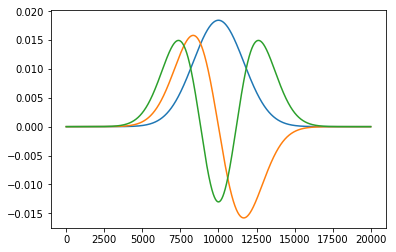

In [3]:
solution = asarray([solution1, solution2, solution3])
plt.plot(solution[0]/(solution[0]**2).sum()**(1/2))
plt.plot(solution[1]/(solution[1]**2).sum()**(1/2))
plt.plot(solution[2]/(solution[2]**2).sum()**(1/2))

## Coulomb drag

In [4]:
e0, e1, m0, m1, d, k = 1,-1,1,1,1,1

In [5]:
final_velocity = []
maximum_distance = []
v_list = []
for j in range(1,100):
    v0=-1*j/10
    
    N=20000
    t1, t2 = 0, 1000
    h = (t2-t1)/N

    #x1, x2, y1, y2 
    x = np.asarray([100, v0, 0, 0])

    #derivative
    def fx(x_):
        fx2 = k*e0*e1*(x_[0]-x_[2])/(m0*(d**2 + (x_[0]-x_[2])**2)**(3/2))
        fy2 = -1*m0*fx2/m1
        return np.asarray([x_[1], fx2, x_[3], fy2])

    #Initializing midpoint
    x_mid = x + h*(1/2)*fx(x)

    # Running leapfrog algorithm
    x_list = []
    x_midlist = []
    for i in range(N):
        x_list.append(x)
        x_midlist.append(x_mid)
        x = x + h*fx(x_mid)
        x_mid = x_mid + h*fx(x)
    
    #storing final velocity and maximum distance of second particle
    assert abs(x[3]-x_list[-1][3]) < 1e-4
    final_velocity.append(x[3])
    maximum_distance.append(np.asarray(x_list)[:,2].max())
    v_list.append(v0)
    


Text(0, 0.5, 'Final velocity of second particle')

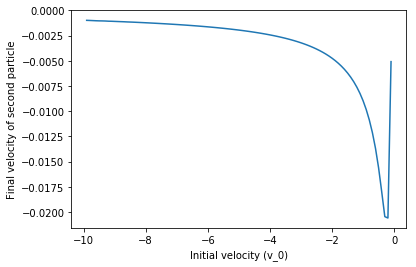

In [6]:
plt.plot(v_list,final_velocity)
plt.xlabel("Initial velocity (v_0)")
plt.ylabel("Final velocity of second particle")

Text(0, 0.5, 'D2_max')

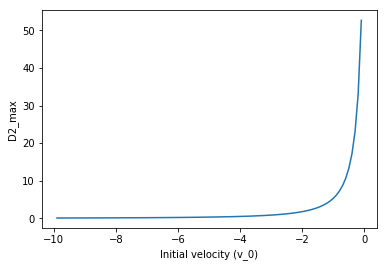

In [7]:
plt.plot(v_list,maximum_distance)
plt.xlabel("Initial velocity (v_0)")
plt.ylabel("D2_max")